# CS-6580 Lecture 15 - Intro to Visualization with Matplotlib
**Dylan Zwick**

*Weber State University*

Today will be our first lecture as part of a two week sequence on data visualization. Our focus the first week will be on data visualization tools - particularly those most commonly used by data analysts and data scientists using Python. Now, there are many other tools for data visualization out there. Some, like Tableau, are major enterprise software packages with hundreds if not thousands of visualization tools. These can be very useful for analysts that want to create visualizations and dashboards, but don't have the time or the skills to code them. However, a common complaint about Tableau is that it does a thousand things - and nothing else. On the other hand, there are entire libraries like [D3](https://d3js.org/) in Javascript that exist to let more experienced programmers create interactive web visualizations. Some of these are really cool - you should check them out! However, D3 programming can be (and is) and entire course on its own. Creating something performant, informative, and beautiful with D3 is a lot of work. You can see some cool examples on the [D3 Github](https://github.com/d3/d3).

We'll not be doing anything that fancy today. Instead, we'll be focusing on visualizations provided by Python through the matplotlib library. These are the visualizations that are most commonly integrated with Jupyter notebooks like t he one you're reading now.



## Matplotlib Basics

Matplotlib, as its name recalls, was originally conceived as a patch to IPython for enabling interactive MATLAB-style plotting. So, it was explicitly modeled on, and attempted to emulate, the graphing features from MATLAB. It received an early boost when it was adopted as the plotting package of choice by th. Space Telescope Science Institute (the folks behind the Hubble Telescope), which financially supported its development and greatly expanded its capabilities.

Now, to get started, we'll of course import our three standard, foundational libraries - with special emphasis today on the third.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#We'll also grab matplotlib itself
import matplotlib as mpl

One thing to note is there are many Matplotlib *styles* to choose from, which are basically premade configurations for standard parameters. We'll start with the "classic" style, but will change as needed.

In [2]:
plt.style.use('classic')

Today we'll also be sticking primarily to static images, although there are capabilities for dynamic, interactive plots using matplotlib as well.

### Matplotlib Interfaces

Lucky us! When using Matplotlib, we get two different interfaces for the price of one. :) It's true. Matplotlib comes with two interfaces - a convenient MATLAB-style state-based interface, and a more powerful object-oriented interface.

The MATLAB-style interface reflects how Matplotlib was originally conceived - as a Python alternative for MATLAB users. This is what is contained in the pyplot interface, which is how we typically interact with matplotlib. For example:

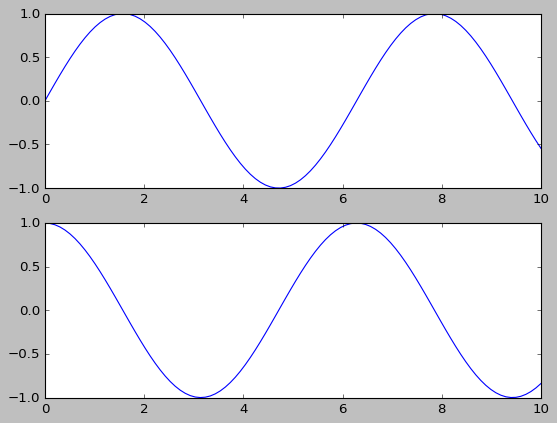

In [3]:
plt.figure() # create a plot figure

x = np.linspace(0,10,100)

# create the first of two panels and set current axis
plt.subplot(2,1,1)
plt.plot(x, np.sin(x))

# create the second panel and set current axis
plt.subplot(2,1,2)
plt.plot(x, np.cos(x)); # The semicolon is deliberate. It stops our code from returning the text for the object it creates.

It's important to recognize that this interface is *stateful*: it keeps track of the "current" figure and axis, which are where all plt commands are applied. You can get a reference to these using the *plt.gcf* (get current figure) and *plt.gca* (get current axes) routines. While this stateful interface is fast and convenient for simple plots, it is easy to run into problems. For example, once the second panel is created, how can we go back and add something to the first? It's possible, but it's clunky.

On the other hand, the object-oriented interface is available for more complicated situations, and for when you want more control over your figure. Rather than depending on some notion of an "active" figure or axes, in the object-oriented interface the plotting functions are methods of explicit Figure and Axes objects. To re-create the previous plot using this style, we could do:

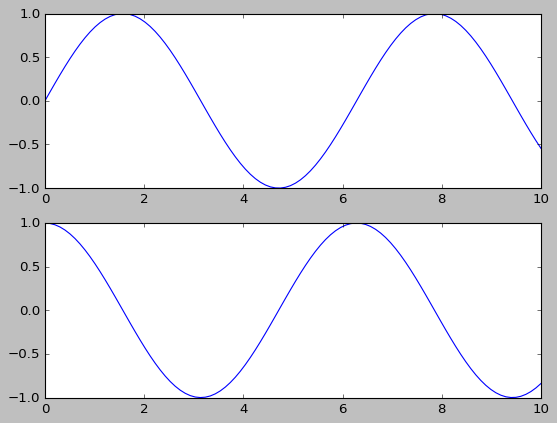

In [4]:
# First create a grid of plots
# ax will be an array of two Axes objects
fig, ax = plt.subplots(2)

# Call plot() method on the appropriate object
ax[0].plot(x, np.sin(x))
ax[1].plot(x,np.cos(x)) #This does not have a semicolor. Notice the object's description below.

For simpler plots, the choice of which style to use is largely a matter of preference, and we'll tend to prefer the former. However, the object-oriented approach can become a necessity as plots become more complicated.

## Line Plots

We'll now take a look at how we can create a customize line plots. We've already created some basic ones above. Note these are typically called line plots, even though almost always what we're plotting won't be lines per se, but curves. The basic idea here is that it's a plot of a single function $y = f(x)$.

We'll first start be creating a figure and axes.

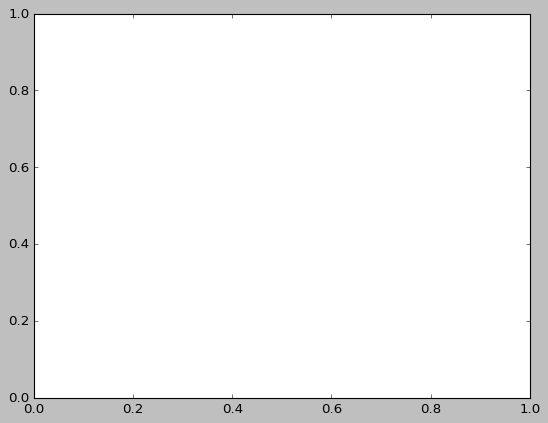

In [5]:
fig = plt.figure()
ax = plt.axes()

The *figure* can be thought of as a single container that contains all the objects represeting axes, graphics, text, and labels. The *axes* is what we see above: a bounding box with ticks, grids, and labels, and which will eventually contain the plot elements that make up our visualization. The shorthand labels *fig* and *ax* used above are pretty standard.

Let's plot some data. We can start with a simple sinusoid:

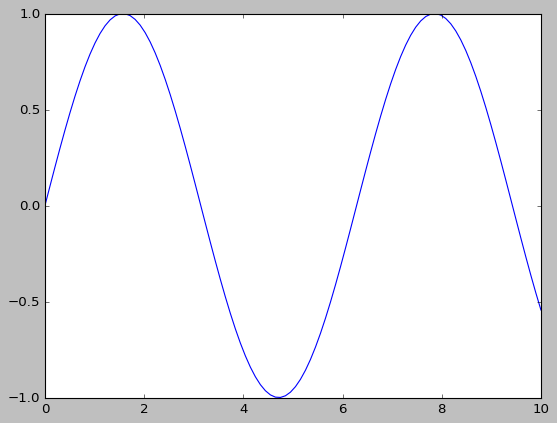

In [6]:
fig = plt.figure()
ax = plt.axes()

ax.plot(x, np.sin(x));

That's all there is to plotting simple functions in Matplotilb!

We'll now dive into how we can control the appearance of the axes and lines.

### Line Colors and Styles

The *plt.plot* function takes additional arguments that can be used to specify these. To adjust the color, you can use the *color* keyword, which accepts a string argument representing virtually any imaginable color. We can specify colors in a [variety of ways](https://matplotlib.org/stable/gallery/color/named_colors.html) - name, short color code, grayscale, hex code, RGB tuble, or HTML color name, etc.

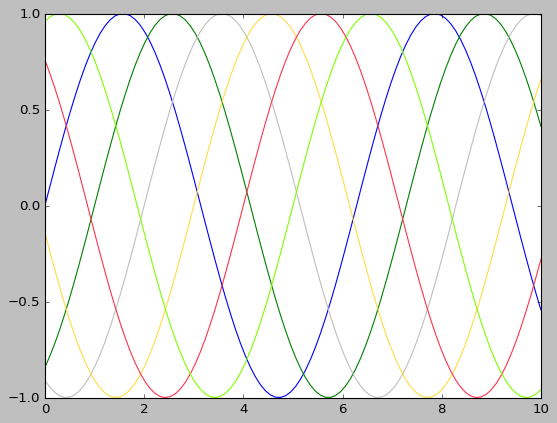

In [7]:
plt.plot(x, np.sin(x-0), color='blue') #specify color by name
plt.plot(x, np.sin(x-1), color='g') #short color code (rgdcmyk)
plt.plot(x, np.sin(x-2), color='0.75') #grayscale between 0 and 1
plt.plot(x, np.sin(x-3), color='#FFDD44') #hex code (RRGGBB, 00 to FF)
plt.plot(x, np.sin(x-4), color=(1.0, 0.2, 0.3)) #RGB tuple, values 0 to 1
plt.plot(x, np.sin(x-5), color='chartreuse');

If no color is specified, Matplotlib will automatically cycle thorugh a set of default colors for multiple lines.

Similarly, the line style can be adjusted using the *linestyle* keyword.

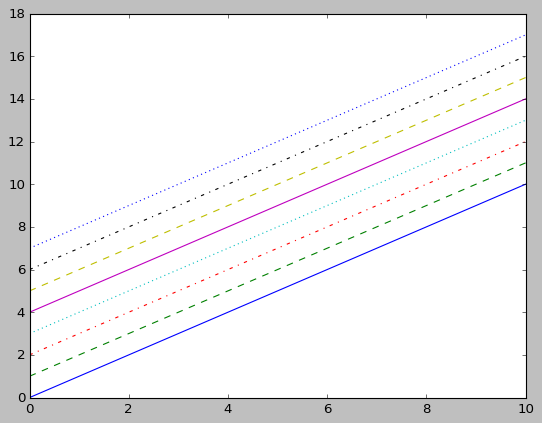

In [8]:
plt.plot(x, x+0, linestyle='solid')
plt.plot(x, x+1, linestyle='dashed')
plt.plot(x, x+2, linestyle='dashdot')
plt.plot(x, x+3, linestyle='dotted')

#For short, you can use the following codes:
plt.plot(x, x+4, linestyle='-') #solid
plt.plot(x, x+5, linestyle = '--') # dashed
plt.plot(x, x+6, linestyle = '-.') # dashdot
plt.plot(x, x+7, linestyle = ':'); #dotted

### Axes Limits

Matplotlib does a decent job of choosing default axes limits for your plot, but sometimes its nice to have finer control. The most basic way to adjust the limits is to use the *plt.xlim* and *plt.ylim* functions.

(-1.5, 1.5)

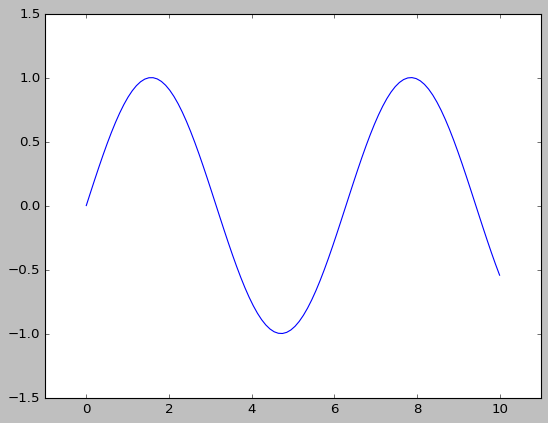

In [9]:
plt.plot(x, np.sin(x))

plt.xlim(-1,11)
plt.ylim(-1.5, 1.5)

There's also a method [*plt.axis*](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axis.html) (not to be confused with *axes* with an *e*), which allows more qualitative specifications of axis limits. For example, we can automatically tighten the bounds around the current content:

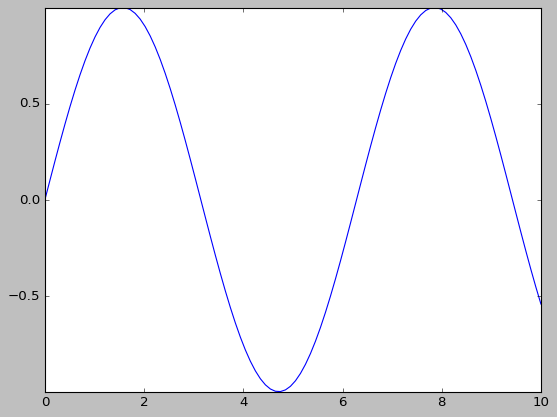

In [10]:
plt.plot(x, np.sin(x))
plt.axis('tight');

Or you can specify that you want an equal axis ratio.

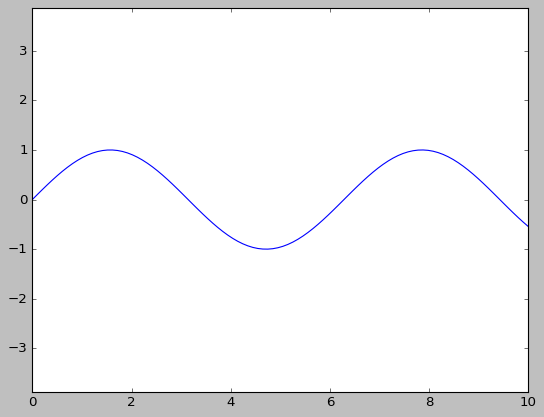

In [11]:
plt.plot(x, np.sin(x))
plt.axis('equal');

Next, we'll take a look at how we can label plots.

## Labeling Plots

Some of the most basic labels we can place on a plot are the titles for the plot and axes. We can se these with the *title*, *xlabel*, and *ylabel* methods.

Text(0, 0.5, 'sin(x)')

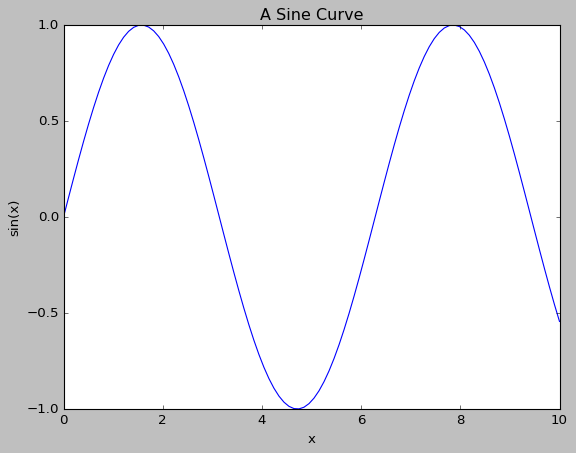

In [12]:
plt.plot(x, np.sin(x))
plt.title("A Sine Curve")
plt.xlabel("x")
plt.ylabel("sin(x)")

Now, if there are multiple elements within a given plot, we might want to use a *legend* to describe them. The simplest legend can be greated with the *plt.legend* method, which automatically creates a legend for any labeled plot elements. Note that we can label an element when we create it using the *label* argument.

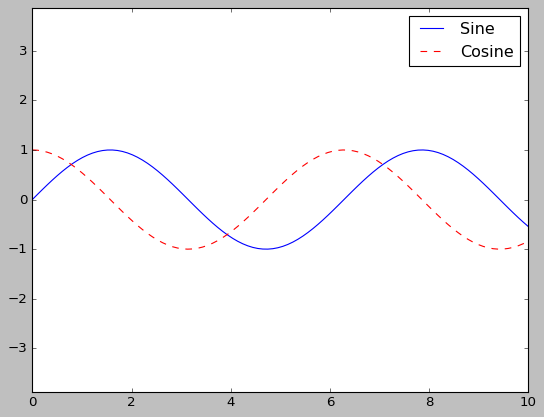

In [13]:
fig, ax = plt.subplots() #Using the more object oriented approach
ax.plot(x, np.sin(x), '-b', label='Sine') # The -b argument says create a solid line and color is blue.
ax.plot(x, np.cos(x), '--r', label='Cosine') #The --r argument says create a dashed line and color it red.
ax.axis('equal')
leg = ax.legend()

There are many ways we might want to customize such a legend. For example, we can specify the location and give it a frame:

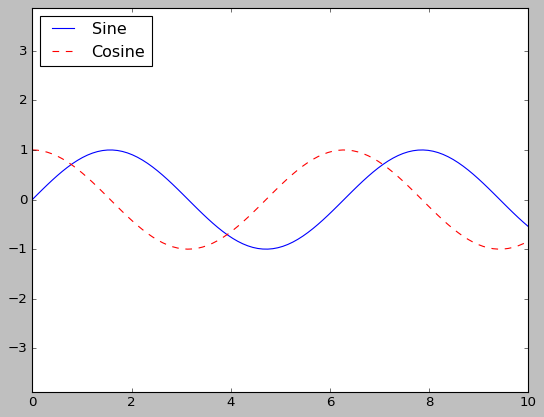

In [14]:
ax.legend(loc='upper left', frameon=True)
fig

We can use the *ncol* command to specify the number of columns in the legend:

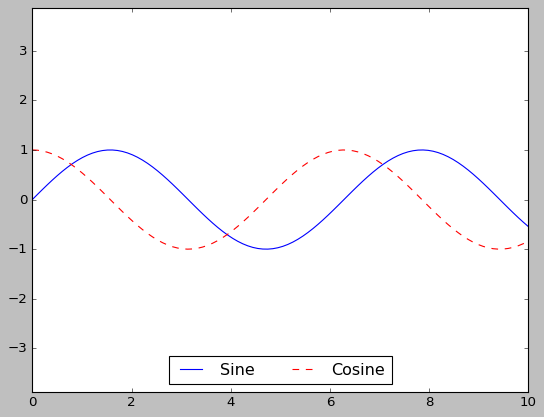

In [15]:
ax.legend(loc = 'lower center', ncol = 2)
fig

We can even give the legend a rounded box (called a "fancy" box), add a shadow, change the transparency of the frame, or change the padding around the text. All covered in the legend [documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html).

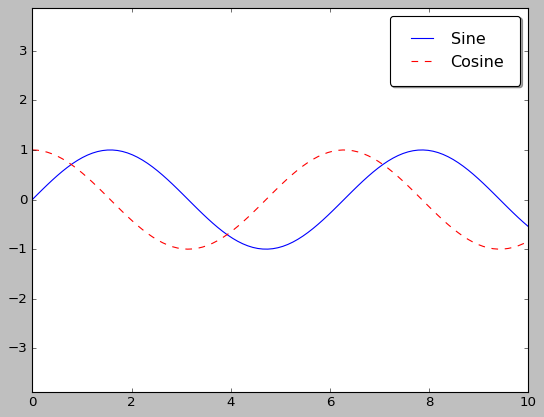

In [16]:
ax.legend(frameon=True, fancybox=True, framealpha=1, shadow=True, borderpad=1)
fig

### Text and Annotation

Creating a good visualization involves guiding the reader so that the figure tells a story. In some cases, this story can be told in an entirely visual manner, whithout the need for added text, but in others, small textual cues and labels are necessary. Perhaps the most basic types of annotations are the axes labels and titles we covered above, but the options go beyond this.

For example, let's take a look at some data around birth numbers by day.

In [17]:
# !mkdir data
!cd data && curl -O https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv .

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  258k  100  258k    0     0   778k      0 --:--:-- --:--:-- --:--:--  780k
curl: (6) Could not resolve host: .


In [18]:
from datetime import datetime

births = pd.read_csv('data/births.csv')

#This section cleans the data. Makes sure our birth numbers are within 5 sigma of the average.
quartiles = np.percentile(births['births'], [25, 50, 75])
mu, sig = quartiles[1], 0.74 * (quartiles[2] - quartiles[0])
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

births['day'] = births['day'].astype(int)

births.index = pd.to_datetime(10000 * births.year +
                              100 * births.month +
                              births.day, format='%Y%m%d')

births_by_date = births.pivot_table('births',
                                    [births.index.month, births.index.day])

births_by_date.index = [datetime(2012, month, day)
                        for (month, day) in births_by_date.index]

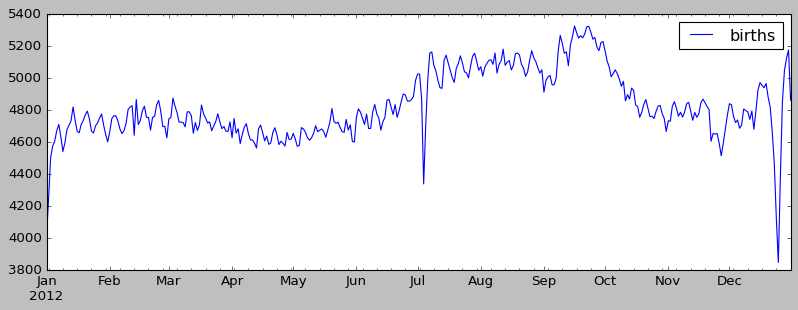

In [19]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax);

Hmm... that's interesting. It appears there's a weekly cycle to this data, some annual modulation, and some significant dips. These dips tend to happen on holidays - for whatever reason, there are fewer births on major holidays. To convey this, we might want to annotate the holidays where we see a significant dip. We can do that as follows:

---



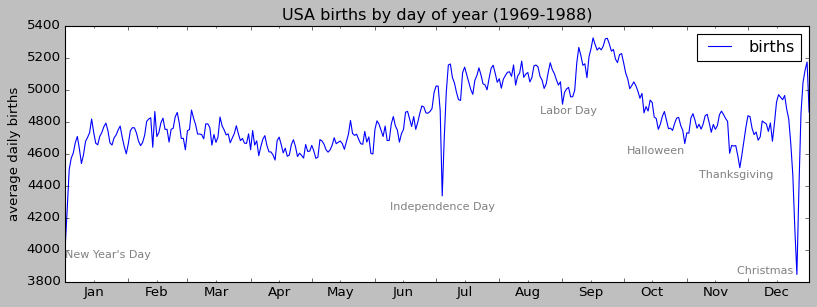

In [20]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax)

# Add labels to the plot
style = dict(size=10, color='gray')

ax.text('2012-1-1', 3950, "New Year's Day", **style)
ax.text('2012-7-4', 4250, "Independence Day", ha='center', **style)
ax.text('2012-9-4', 4850, "Labor Day", ha='center', **style)
ax.text('2012-10-31', 4600, "Halloween", ha='right', **style)
ax.text('2012-11-25', 4450, "Thanksgiving", ha='center', **style)
ax.text('2012-12-25', 3850, "Christmas ", ha='right', **style)

# Label the axes
ax.set(title='USA births by day of year (1969-1988)',
       ylabel='average daily births')

# Format the x-axis with centered month labels
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'));

The ax.text method takes an x position, a y position, a string, and then optional keywords specifying the color, size, style, alignment, and other properties of the text. Here we used ha='right' and ha='center', where ha is short for horizontal alignment. See the docstrings of plt.text and mpl.text.Text for more information on the available options.

Along with tick marks and text, another useful annotation mark is the simple arrow. To create one, you can use the plt.annotate() function. This function creates some text and an arrow, and the arrows can be very flexibly specified.

For example, here's annotate with several of its options:

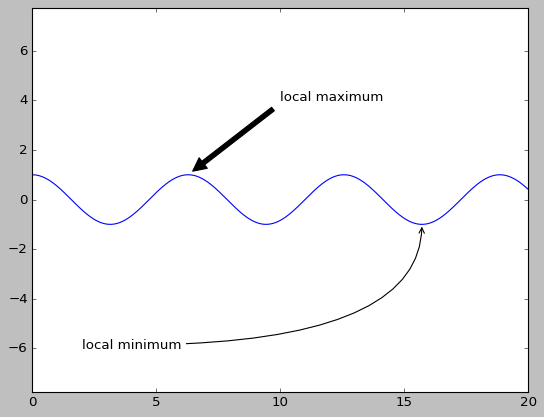

In [21]:
fig, ax = plt.subplots()

x = np.linspace(0, 20, 1000)
ax.plot(x, np.cos(x))
ax.axis('equal')

ax.annotate('local maximum', xy=(6.28, 1), xytext=(10, 4),
            arrowprops=dict(facecolor='black', shrink=0.05))

ax.annotate('local minimum', xy=(5 * np.pi, -1), xytext=(2, -6),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle3,angleA=0,angleB=-90"));

The arrow style is controlled through the arrowprops dictionary, which has numerous options available. These options are fairly well-documented [online](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.annotate.html), so rather than repeating them here it is probably more useful to quickly show some of the possibilities. Let's demonstrate several of the possible options using the birthrate plot from before:

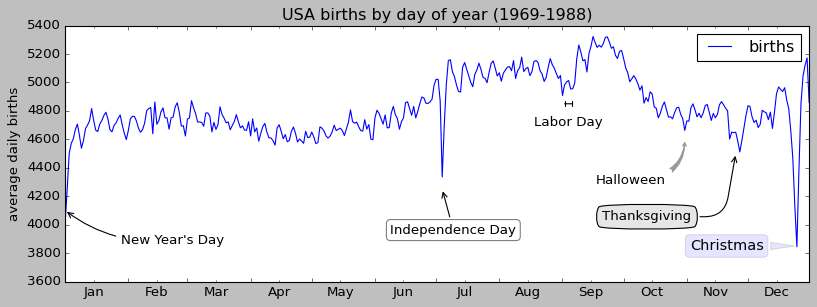

In [22]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax)

# Add labels to the plot
ax.annotate("New Year's Day", xy=('2012-1-1', 4100),  xycoords='data',
            xytext=(50, -30), textcoords='offset points',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3,rad=-0.2"))

ax.annotate("Independence Day", xy=('2012-7-4', 4250),  xycoords='data',
            bbox=dict(boxstyle="round", fc="none", ec="gray"),
            xytext=(10, -40), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->"))

ax.annotate('Labor Day', xy=('2012-9-4', 4850), xycoords='data', ha='center',
            xytext=(0, -20), textcoords='offset points')
ax.annotate('', xy=('2012-9-1', 4850), xytext=('2012-9-7', 4850),
            xycoords='data', textcoords='data',
            arrowprops={'arrowstyle': '|-|,widthA=0.2,widthB=0.2', })

ax.annotate('Halloween', xy=('2012-10-31', 4600),  xycoords='data',
            xytext=(-80, -40), textcoords='offset points',
            arrowprops=dict(arrowstyle="fancy",
                            fc="0.6", ec="none",
                            connectionstyle="angle3,angleA=0,angleB=-90"))

ax.annotate('Thanksgiving', xy=('2012-11-25', 4500),  xycoords='data',
            xytext=(-120, -60), textcoords='offset points',
            bbox=dict(boxstyle="round4,pad=.5", fc="0.9"),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle,angleA=0,angleB=80,rad=20"))


ax.annotate('Christmas', xy=('2012-12-25', 3850),  xycoords='data',
             xytext=(-30, 0), textcoords='offset points',
             size=13, ha='right', va="center",
             bbox=dict(boxstyle="round", alpha=0.1),
             arrowprops=dict(arrowstyle="wedge,tail_width=0.5", alpha=0.1));

# Label the axes
ax.set(title='USA births by day of year (1969-1988)',
       ylabel='average daily births')

# Format the x axis with centered month labels
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'));

ax.set_ylim(3600, 5400);

You'll notice that the specifications of the arrows and text boxes are very detailed: this gives you the power to create nearly any arrow style you wish. Unfortunately, it also means that these sorts of features often must be manually tweaked, a process that can be very time consuming when producing publication-quality graphics! Finally, I'll note that the preceding mix of styles is **by no means best practice** for presenting data, but rather included as a demonstration of some of the available options.

## Multiple Subplots

Sometimes it is helpful to compare different views of data side by side. To this end, Matplotlib has the concept of subplots: groups of smaller axes that can exist together within a single figure. These subplots might be insets, grids of plots, or other more complicated layouts.

### Subplots by hand

The most basic method of creating an axes is to use the plt.axes function. As we've seen previously, by default this creates a standard axes object that fills the entire figure. plt.axes also takes an optional argument that is a list of four numbers in the figure coordinate system. These numbers represent [left, bottom, width, height] in the figure coordinate system, which ranges from 0 at the bottom left of the figure to 1 at the top right of the figure.

For example, we might create an inset axes at the top-right corner of another axes by setting the x and y position to 0.65 (that is, starting at 65% of the width and 65% of the height of the figure) and the x and y extents to 0.2 (that is, the size of the axes is 20% of the width and 20% of the height of the figure):

In [23]:
plt.style.use('seaborn-white')

<ipython-input-23-2ff7d366684c>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


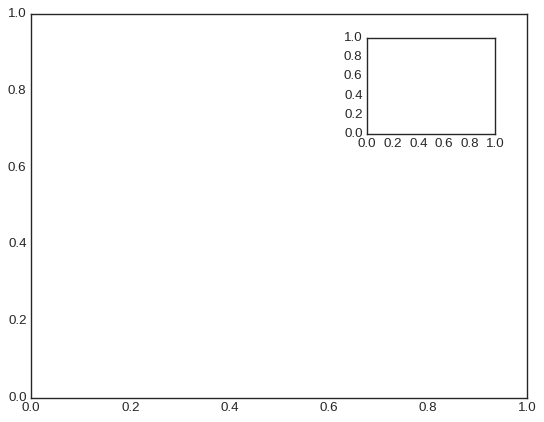

In [24]:
ax1 = plt.axes()  # standard axes
ax2 = plt.axes([0.65, 0.65, 0.2, 0.2])

The equivalent of this command within the object-oriented interface is fig.add_axes(). Let's use this to create two vertically stacked axes:

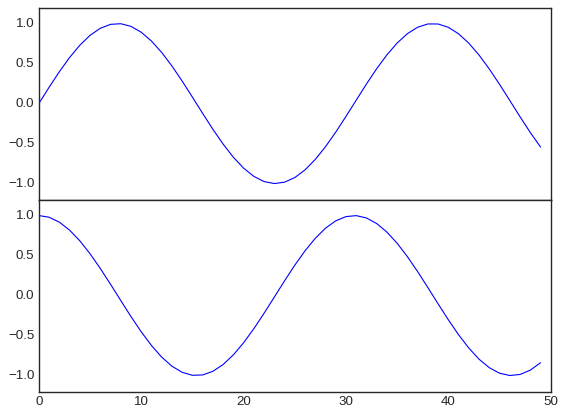

In [25]:
fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4],
                   xticklabels=[], ylim=(-1.2, 1.2))
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4],
                   ylim=(-1.2, 1.2))

x = np.linspace(0, 10)
ax1.plot(np.sin(x))
ax2.plot(np.cos(x));

We now have two axes (the top with no tick labels) that are just touching: the bottom of the upper panel (at position 0.5) matches the top of the lower panel (at position 0.1 + 0.4).

### Simple Grids of Subplots

Aligned columns or rows of subplots are a common-enough need that Matplotlib has several convenience routines that make them easy to create. The lowest level of these is plt.subplot(), which creates a single subplot within a grid. As you can see, this command takes three integer arguments—the number of rows, the number of columns, and the index of the plot to be created in this scheme, which runs from the upper left to the bottom right:

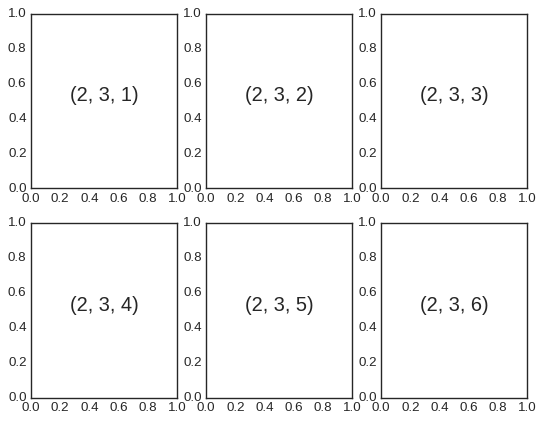

In [26]:
for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.text(0.5, 0.5, str((2, 3, i)),
             fontsize=18, ha='center')

The command plt.subplots_adjust can be used to adjust the spacing between these plots. The following code uses the equivalent object-oriented command, fig.add_subplot():

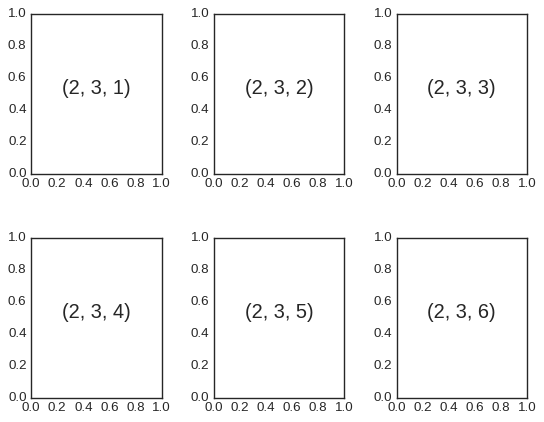

In [27]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i)
    ax.text(0.5, 0.5, str((2, 3, i)),
           fontsize=18, ha='center')

We've used the *hspace* and *wspace* arguments of *plt.subplots_adjust*, which specify the spacing along the height and width of the figure, in units of the subplot size (in this case, the space is 40% of the subplot width and height).

### The Whole Grid In One Go

The approach just described can become quite tedious when creating a large grid of subplots, especially if you'd like to hide the x- and y-axis labels on the inner plots. For this purpose, *plt.subplots()* is the easier tool to use (note the s at the end of subplots). Rather than creating a single subplot, this function creates a full grid of subplots in a single line, returning them in a NumPy array. The arguments are the number of rows and number of columns, along with optional keywords *sharex* and *sharey*, which allow you to specify the relationships between different axes.

Here we'll create a $2 \times 3$ grid of subplots, where all axes in the same row share their y-axis scale, and all axes in the same column share their x-axis scale:

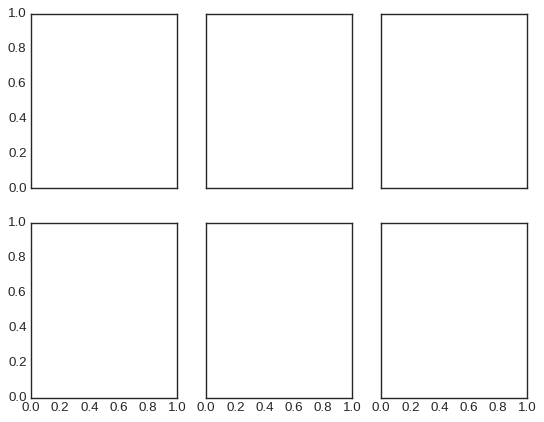

In [28]:
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')

Note that by specifying *sharex* and *sharey*, we've automatically removed inner labels on the grid to make the plot cleaner. The resulting grid of axes instances is returned within a NumPy array, allowing for convenient specification of the desired axes using standard array indexing notation:

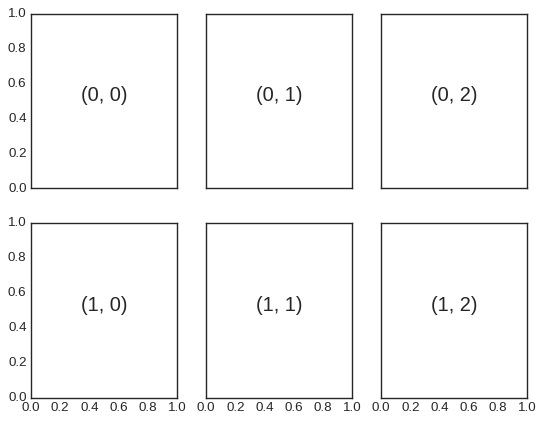

In [29]:
# axes are in a two-dimensional array, indexed by [row, col]
for i in range(2):
    for j in range(3):
        ax[i, j].text(0.5, 0.5, str((i, j)),
                      fontsize=18, ha='center')
fig

In comparison to *plt.subplot()*, *plt.subplots()* is more consistent with Python's conventional 0-based indexing.



Next time, we'll explore some of these features in more depth - in particular Seaborn.
